**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


C:\Users\JEREMY\AppData\Local\Temp\ipykernel_21440\2714545669.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=top_df_train, palette='viridis')


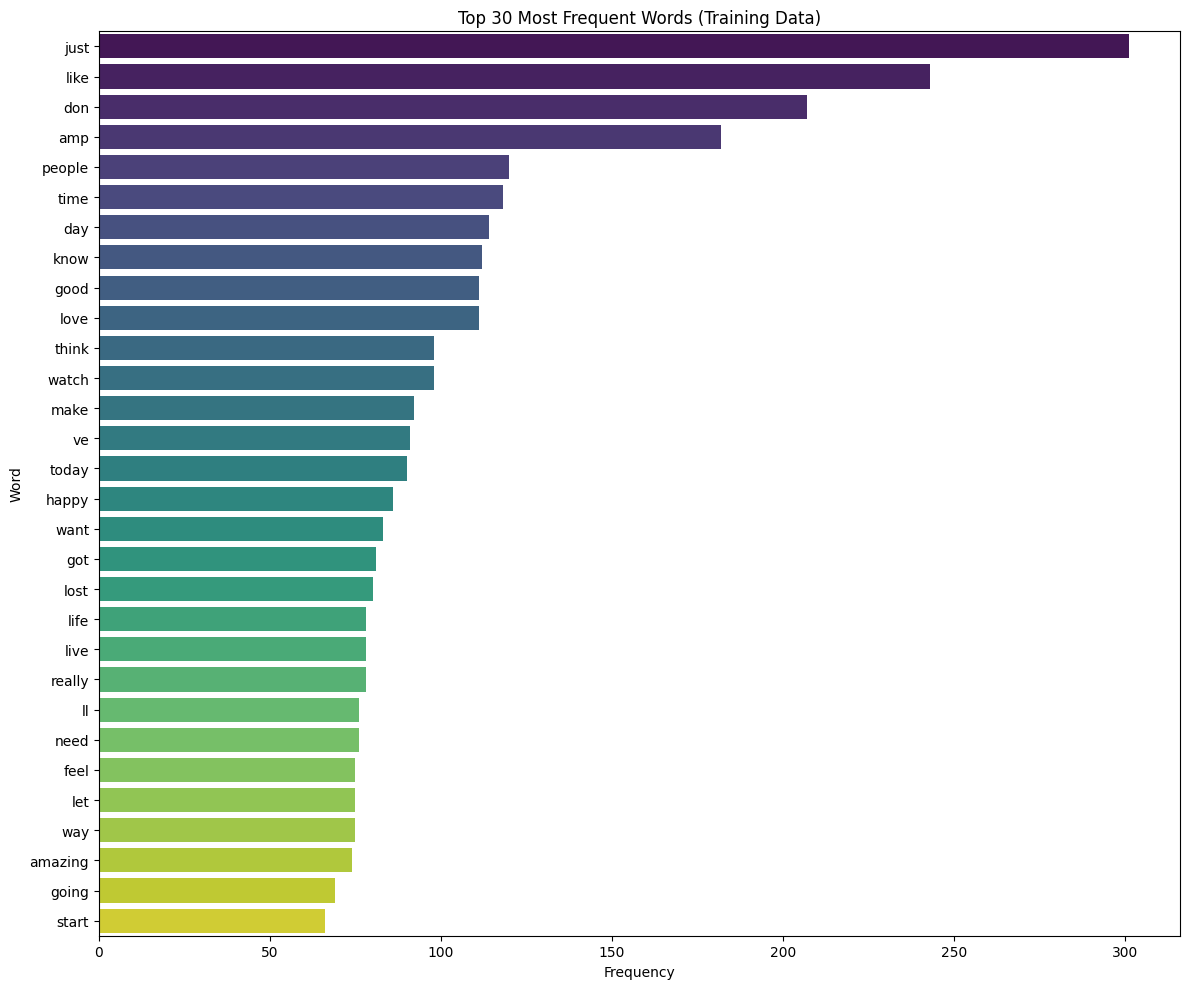

C:\Users\JEREMY\AppData\Local\Temp\ipykernel_21440\2714545669.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=top_df_test, palette='plasma')


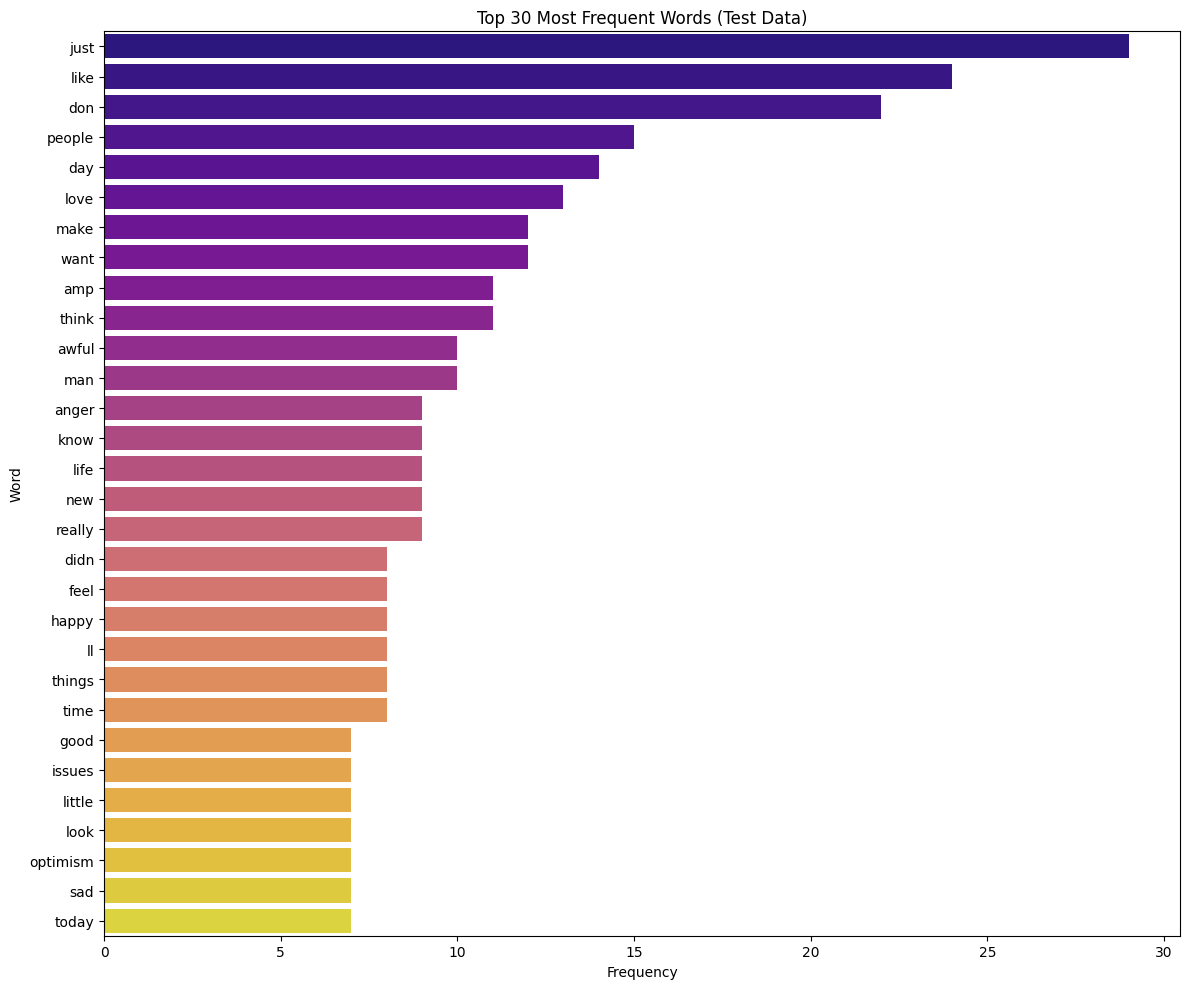

In [ ]:
# Answer here
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer

def plot_top_words(train_df, test_df, top_n=30):

    # Combine text to build a consistent vocabulary
    all_text = pd.concat([train_df['text'], test_df['text']], ignore_index=True)
    
    # Create the vectorizer
    # stop_words='english': Removes common words like 'the', 'is', 'a'
    # lowercase=True: Treats 'Word' and 'word' as the same
    vectorizer = CountVectorizer(stop_words='english', lowercase=True)
    
    # Fit the vectorizer on ALL text to create a single, shared vocabulary
    vectorizer.fit(all_text)
    
    # get the list of all words in the vocabulary
    words = vectorizer.get_feature_names_out()

    
    # Transform the text using the shared vocabulary
    word_counts_train = vectorizer.transform(train_df['text'])

    # sum word counts across all training documents
    sum_words_train = word_counts_train.sum(axis=0)

    # Get word-frequency pairs
    words_freq_train = [(word, sum_words_train[0, i]) for i, word in enumerate(words)]

    # sort by frequency and get the top N words
    words_freq_train = sorted(words_freq_train, key=lambda x: x[1], reverse=True)
    top_words_train = words_freq_train[:top_n]

    # Create a DataFrame for easy plotting
    top_df_train = pd.DataFrame(top_words_train, columns=['word', 'frequency'])

    #Plot the training results
    plt.figure(figsize=(12, 10))
    sns.barplot(x='frequency', y='word', data=top_df_train, palette='viridis')
    # Updated title for clarity
    plt.title(f'Top {top_n} Most Frequent Words (Training Data)')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show() # Display the first plot


    # now the test
    word_counts_test = vectorizer.transform(test_df['text'])

    # sum word counts across all test documents
    sum_words_test = word_counts_test.sum(axis=0)

    # Get word-frequency pairs
    words_freq_test = [(word, sum_words_test[0, i]) for i, word in enumerate(words)]

    # sort by frequency and get the top N words
    words_freq_test = sorted(words_freq_test, key=lambda x: x[1], reverse=True)
    top_words_test = words_freq_test[:top_n]

    # Create a DataFrame for easy plotting
    top_df_test = pd.DataFrame(top_words_test, columns=['word', 'frequency'])

    #Plot the test results
    plt.figure(figsize=(12, 10)) # Create a new figure for the second plot
    # Using a different palette to distinguish it
    sns.barplot(x='frequency', y='word', data=top_df_test, palette='plasma') 
    plt.title(f'Top {top_n} Most Frequent Words (Test Data)')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show() # Display the second plot


plot_top_words(train_df, test_df)



---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [38]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [39]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [40]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

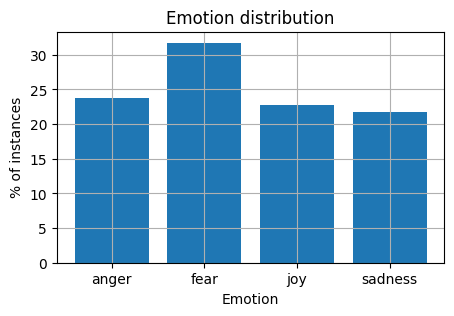

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [ ]:
# Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

#Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [14]:
# check the result
train_data_BOW_features

<3613x10115 sparse matrix of type '<class 'numpy.int64'>'
	with 51467 stored elements in Compressed Sparse Row format>

In [15]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [16]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [18]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [19]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [20]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

d:\Disk E\Jeremy\NTHU\Kuliah\Sem 7\Data Mining\HW\DM2025Labs\DM2025-Lab2-Exercise\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3613, 500)

In [21]:
train_data_BOW_features_500.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [2, 3, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 3, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheerfully', 'cheering', 'cheery',
       'come', 'comes', 'could', 'country'], dtype=object)

In [23]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [24]:
# Answer here

from sklearn.feature_extraction.text import TfidfVectorizer
def create_tfidf_features(train_df, test_df):
    """
    Generates TF-IDF features and prints a slice of feature names.
    """
    
    tfidf_vectorizer = TfidfVectorizer(
        max_features=1000,
        stop_words='english',
        lowercase=True
    )

    train_data_tfidf_features = tfidf_vectorizer.fit_transform(train_df['text'])

    test_data_tfidf_features = tfidf_vectorizer.transform(test_df['text'])

    
    #    This retrieves the list of 1000 words that the vectorizer learned.
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Show the feature names for features [100:110]
    print(f"Feature names from index 100 to 110 (total {len(feature_names)} features):")
    print(feature_names[100:110])

create_tfidf_features(train_df, test_df)


Feature names from index 100 to 110 (total 1000 features):
['blue' 'blues' 'body' 'boiling' 'book' 'boss' 'bought' 'bout' 'boy'
 'break']


---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [25]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [26]:
## build DecisionTree model
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['anger', 'fear', 'anger', 'sadness', 'fear', 'joy', 'joy', 'joy',
       'fear', 'fear'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [27]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.68


In [28]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.66      0.68      0.67        84
        fear       0.66      0.69      0.67       110
         joy       0.72      0.71      0.71        79
     sadness       0.70      0.64      0.67        74

    accuracy                           0.68       347
   macro avg       0.68      0.68      0.68       347
weighted avg       0.68      0.68      0.68       347



In [29]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[57 18  6  3]
 [16 76  9  9]
 [ 6  9 56  8]
 [ 7 13  7 47]]


In [30]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

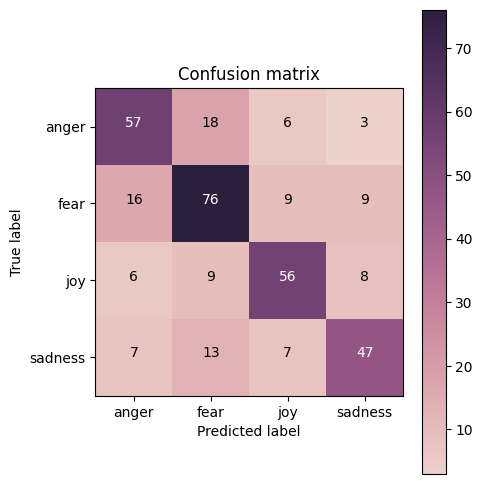

In [31]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [32]:
# Answer here


The numbers on the diagonal line are all the "wins." I can see the model correctly identified anger 57 times, fear 76 times, joy 56 times, and sadness 47 times. This tells me right away that my model is best at spotting fear (since 76 is the highest) and struggles the most with sadness (which it only got right 47 times).

The other numbers in the chart show all the mistakes. The biggest problem I've found is that my model has a very hard time telling anger and fear apart. It mistook anger for fear 18 times, and it did the exact opposite, mistaking fear for anger 16 times. That's a major two-way confusion. Another big error I see is that sadness was often mislabeled as fear (13 times).

So, my main conclusion is that even though my model is right more often than it's wrong (the diagonal numbers are the biggest in their rows), its biggest weakness is how it confuses anger, fear, and sadness with each other. It seems that "fear" is a really common wrong answer, as my model often picks it when it should have seen anger or sadness.



---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [33]:
# Answer here

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

NB_model = MultinomialNB()

# We fit the Naive Bayes model
NB_model = NB_model.fit(X_train, y_train)

# We use the new NB_model to predict
y_train_pred = NB_model.predict(X_train)
y_test_pred = NB_model.predict(X_test)

## so we get the pred result
print("Sample test predictions:")
print(y_test_pred[:10])



Sample test predictions:
['fear' 'anger' 'anger' 'sadness' 'fear' 'joy' 'joy' 'fear' 'fear' 'fear']


In [34]:
## accuracy
# This part stays the same, it just uses the predictions from the NB_model
acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

## precision, recall, f1-score,
# This part also stays the same
print(classification_report(y_true=y_test, y_pred=y_test_pred))

## check by confusion matrix
# This part also stays the same
print("Confusion Matrix:")
cm2 = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm2)


training accuracy: 0.79
testing accuracy: 0.7
              precision    recall  f1-score   support

       anger       0.63      0.65      0.64        84
        fear       0.73      0.77      0.75       110
         joy       0.78      0.71      0.74        79
     sadness       0.64      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347

Confusion Matrix:
[[55 15  5  9]
 [ 9 85  5 11]
 [11  6 56  6]
 [12 10  6 46]]


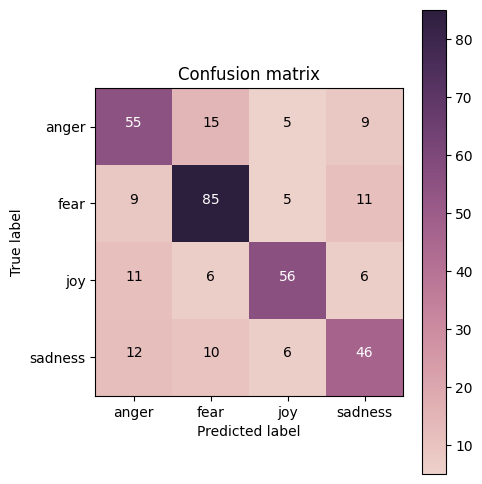

In [35]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm2, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [36]:
# Answer here
# Below

After running both models, my results show that the Naive Bayes model, with 70% test accuracy, performs slightly better than my Decision Tree model, which had 68% test accuracy. But the most important difference isn't just that 2% gap; it's overfitting. My Decision Tree achieved 99% accuracy on the training data, but this performance dropped to 68% on the test data. This massive 31% drop is a classic sign of overfitting. In contrast, my Naive Bayes model scored 79% on training and 70% on testing. This is a much healthier and smaller drop of only 9%, which shows the Naive Bayes model was far better at generalizing what it learned.

This difference makes perfect sense when I think about the theory behind these models. Decision Trees are known as "high-variance" models. By default, they will keep splitting and branching, creating a massive, deep tree with thousands of "if/then" rules just to get every single training sample right. My model clearly did this, "memorizing" the training data by creating rules that were too specific. When my model saw new, unseen data from the test set, those hyperspecific rules didn't apply, and its performance fell apart. somtimes it might learned the noise, not just the signal.

Naive Bayes, on the other hand, is a much simpler, "probabilistic" model. It doesn't create complex rules; it just calculates the probability of an emotion given the words in the text. It operates on the "naive" assumption that every word is independent, which we know isn't really true. However, this simplicity acts as a powerful regularizer, preventing the model from being "fooled" by the noise in the training data.

Looking at my Decision Tree's confusion matrix, its biggest problem was a strong, two-way confusion between anger (18 errors) and fear (16 errors). My Naive Bayes model, however, was significantly better at this specific task. While it still mistook anger for fear (15 times), it was much more confident about fear, only mistaking it for anger 9 times. This specific improvement seems to be a key reason it pulled ahead in overall accuracy

---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [58]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [59]:
import keras

In [60]:
BOW_500.transform(test_df['text'])

<347x500 sparse matrix of type '<class 'numpy.int64'>'
	with 4103 stored elements in Compressed Sparse Row format>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [61]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 553       anger
3585    sadness
1459       fear
1379       fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [62]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [63]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [64]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 500)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax (Softmax)               │ (None, 4)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [65]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.3839 - loss: 1.3275 - val_accuracy: 0.4380 - val_loss: 1.2753
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6488 - loss: 0.9735 - val_accuracy: 0.6513 - val_loss: 0.9180
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8029 - loss: 0.5698 - val_accuracy: 0.6945 - val_loss: 0.7678
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8552 - loss: 0.3997 - val_accuracy: 0.6715 - val_loss: 0.7964
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8857 - loss: 0.3226 - val_accuracy: 0.6657 - val_loss: 0.8377
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9106 - loss: 0.2593 - val_accuracy: 0.6744 - val_loss: 0.8955
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9294 - loss: 0.2145 - val_accuracy: 0.6715 - val_loss: 0.9575
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9482 - loss: 0.1785 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [71]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


array([[4.8250421e-03, 9.1129202e-01, 1.8356368e-02, 6.5526582e-02],
       [7.2702423e-02, 9.2683238e-01, 1.5020363e-04, 3.1503537e-04],
       [9.9607807e-01, 1.6741826e-04, 2.9007180e-07, 3.7542921e-03],
       [6.0630478e-05, 2.5489412e-03, 7.2776071e-05, 9.9731761e-01],
       [6.6203843e-03, 4.2690456e-01, 3.7849531e-01, 1.8797973e-01]],
      dtype=float32)

In [72]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['fear', 'fear', 'anger', 'sadness', 'fear'], dtype=object)

In [73]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.65


In [74]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.383891,1.327545,0.438040,1.275266
1,1,0.648768,0.973489,0.651297,0.918024
2,2,0.802934,0.569830,0.694524,0.767773
3,3,0.855245,0.399652,0.671470,0.796397
4,4,0.885691,0.322644,0.665706,0.837665
5,5,0.910601,0.259252,0.674352,0.895486
6,6,0.929422,0.214532,0.671470,0.957462
7,7,0.948242,0.178542,0.662824,1.014724
8,8,0.952117,0.155921,0.654179,1.095210
9,9,0.958483,0.136774,0.657061,1.141178


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


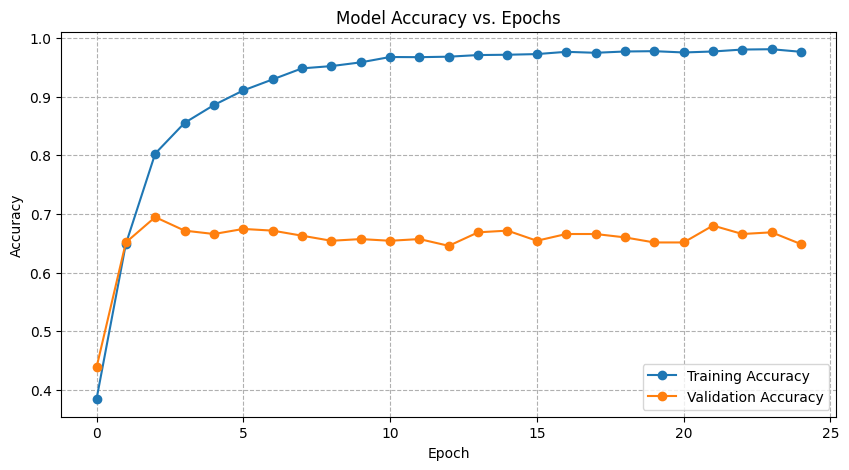

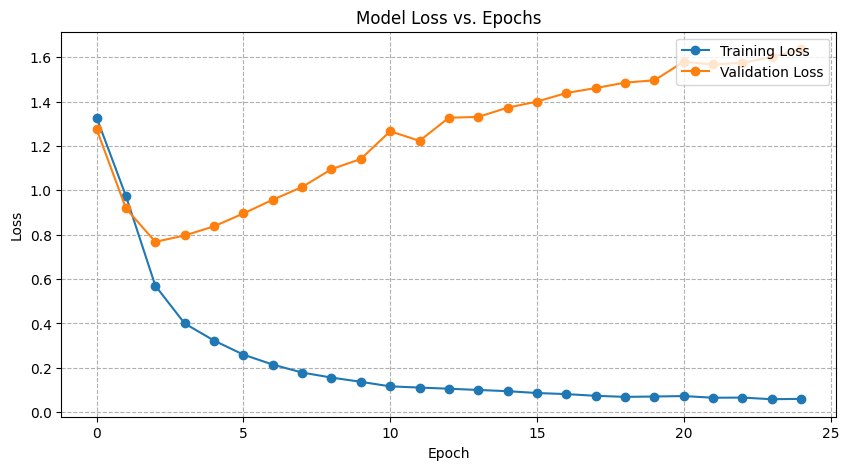

Plotting complete.


In [76]:
# Answer here

acc_col = 'accuracy' if 'accuracy' in training_log.columns else 'acc'
val_acc_col = 'val_accuracy' if 'val_accuracy' in training_log.columns else 'val_acc'

# plot 1: Model Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history[acc_col], label='Training Accuracy', marker='o')
plt.plot(history.history[val_acc_col], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy vs. Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--')
plt.show()

# plot 2: Model Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss vs. Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.show()

print("Plotting complete.")

The top chart (Accuracy) shows this clearly. The blue line (Training Accuracy) goes up to nearly perfect 100%. This means the model got almost perfect score on the data it had already seen. But the orange line (Validation Accuracy), which is the real test on new data, got stuck after just 2 or 3 tries (epochs). The huge gap that forms between the blue and orange lines is the proof that it's just memorizing.

The bottom chart (Loss) is even clearer. The blue line (Training Loss) drops to almost zero, meaning the model became almost100% sure of its "memorized" answers. But the orange line (Validation Loss) hit its lowest point and then started to go back up. This is the biggest warning sign. It means all the extra training after epoch 3 was actually making my model worse at handling new data.

Simply said, if training loss is decreasing, but the validation loss is increasing it is a sign of overfitting, it just memorized the answers it was trained on, and did not generalize.

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [78]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
553,10553,@BonesARP 'That is a disappointment.'\n\nHe fa...,"[@, BonesARP, 'That, is, a, disappointment, .,..."
3585,40758,Very long day. Thank goodness for Bake Off to ...,"[Very, long, day, ., Thank, goodness, for, Bak..."
1459,20602,3:45am and off to the hospital! Elouise's wate...,"[3:45am, and, off, to, the, hospital, !, Eloui..."
1379,20522,@williamcontrol just preordered The Pale EP......,"[@, williamcontrol, just, preordered, The, Pal..."
1321,20464,@markhberman2003 @LanceZierlein @790blessing e...,"[@, markhberman2003, @, LanceZierlein, @, 790b..."


In [79]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'BonesARP', "'That", 'is', 'a', 'disappointment', '.', "'\\n\\nHe", 'fakes', 'a', 'pout', ',', 'then', 'starts', 'to', 'chuckle', '.']),
       list(['Very', 'long', 'day', '.', 'Thank', 'goodness', 'for', 'Bake', 'Off', 'to', 'brighten', 'up', 'a', 'weary', 'Wednesday', '☺', '#', 'GBBO']),
       list(['3:45am', 'and', 'off', 'to', 'the', 'hospital', '!', 'Elouise', "'s", 'waters', 'have', 'gone', '!', '#', 'Labour', '#', 'LittleSister', '#', 'superexcited'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [80]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [81]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.5267433 ,  0.1816883 , -0.14895478, -0.24512137, -0.24374333,
       -0.8995302 ,  0.75420827,  0.9918763 , -0.23470524, -0.6036419 ,
       -0.5598616 , -0.39307418, -0.43764475,  0.24428265, -0.15291187,
       -0.4980789 , -0.05743796, -0.6385614 ,  0.27791888, -1.3085177 ,
        0.7746018 ,  0.7483081 ,  0.48987836,  0.03051155,  0.5048703 ,
        0.12755093, -0.69595695,  0.4706007 , -0.2784836 ,  0.6534346 ,
        0.11066636, -0.02149654,  0.5521343 , -0.61047757, -0.2958831 ,
        0.68724173,  0.00950365, -0.16680041, -0.70837045, -0.56295   ,
        0.21059196,  0.1084438 , -0.51103055,  0.1051878 ,  0.70790637,
       -0.17318922, -0.69786924,  0.30552682,  0.48013088,  0.7223617 ,
        0.18566187, -0.38811988, -0.10843126,  0.21916363, -0.31993395,
       -0.2667687 ,  0.07755966, -0.22950272, -0.14879745, -0.18222895,
        0.276456  , -0.3024753 ,  0.50077957,  0.3622222 , -0.26323086,
        0.59541667,  0.76806945,  0.3342937 , -1.2265738 ,  0.85

In [83]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('blessed', 0.9264214634895325),
 ('Be', 0.915838897228241),
 ('Makes', 0.9123173356056213),
 ('birthday', 0.9028754234313965),
 ('free', 0.8978978395462036),
 ('Kik', 0.8920996189117432),
 ('cats', 0.8919795751571655),
 ('dad', 0.8867151141166687),
 ('right', 0.8851487636566162),
 ('help', 0.8850526809692383)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [84]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049172401428),
 ('satisfied', 0.6437949538230896),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665286064148)]

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [85]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [87]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [ ]:
# Answer here
# below

The most common and direct way to solve this is to aggregate the word vectors into a single "sentence vector." The simplest and most popular method for this is Vector Averaging, which creates a new feature vector representing the "average meaning" of all the words in the sentence.

The process is straightforward: for each sentence in our dataset, we look up the pre-trained vector for every word it contains. Then, we sum all of those individual word vectors together, element by element. Finally, we divide that total summed vector by the number of words in the sentence to get the average. The result is a single vector, (e.g., 300 dimensions long), that now represents our entire sentence. We would do this for every single row in our training and test sets.

Once we have pre-processed our data this way, our X_train and X_test will be 2D arrays, where each row is one of these new "average sentence vectors." This data is now in the standard format that classic machine learning models expect. This means we can feed this new, semantically-rich data into models like Random Forest, Logistic Regression, or Support Vector Machines (SVMs).

The main tradeoff with this averaging approach is that it completely loses all information about word order, it treats "I feel angry" and "angry feel I" as the same. However, it is extremely fast to compute and often works surprisingly well. It's an excellent feature engineering technique to use, especially to contrast with the more complex sequential models (like LSTM).

---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [88]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [89]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 1
word: angry 	 cluster: 1
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [90]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

In [91]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [92]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

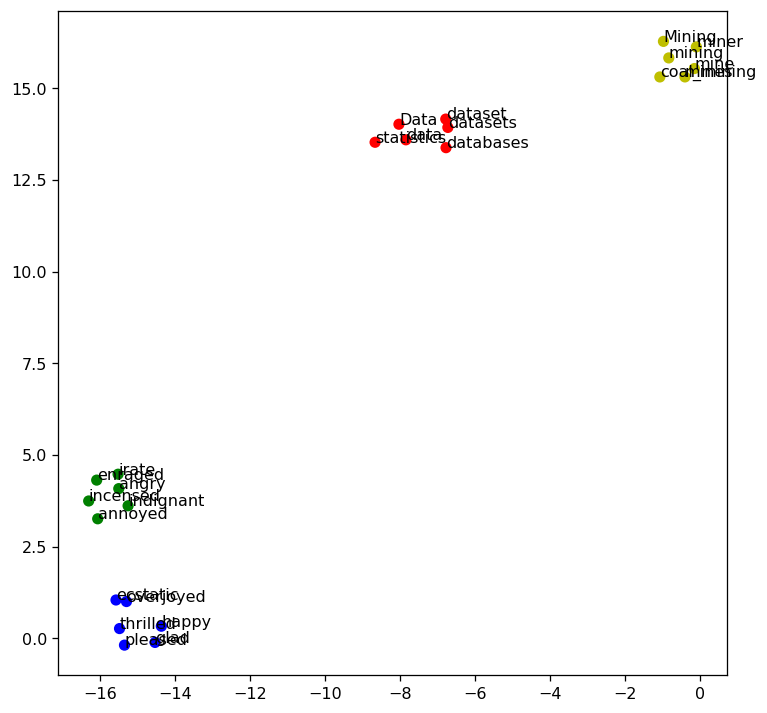

In [93]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

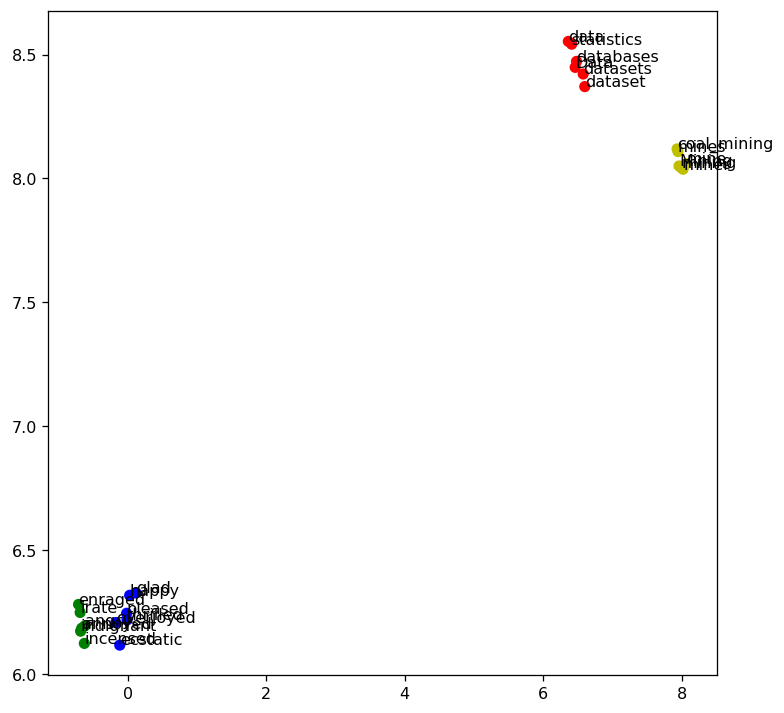

In [94]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

In [96]:
# Answer here

main_words = ["angry", "happy", "sad", "fear"]
# Assign a color to each main word group
main_colors = ['red', 'green', 'blue', 'purple'] 

target_words = []
color_list = []
X_train_list = []

for word, color in zip(main_words, main_colors):
    # Add the main word itself
    if word in model:
        target_words.append(word)
        color_list.append(color)
        X_train_list.append(model[word])
    else:
        print(f"Main word '{word}' not in vocabulary")
        continue
    
    # Find and add the 15 most similar words
    try:
        similar_words = model.most_similar(word, topn=15)
        for sim_word, _ in similar_words:
            if sim_word in model:
                target_words.append(sim_word)
                color_list.append(color)
                X_train_list.append(model[sim_word])
            else:
                print(f"Similar word '{sim_word}' not in vocabulary.")
                
    except KeyError:
        print(f"Could not find similar words for '{word}'.")

# Convert the list of vectors to a 2D numpy array
X_train = np.array(X_train_list)
print(f"Total words to plot: {len(target_words)}")


Total words to plot: 64


totAL words to plot = 64, because 4*15 words + 4 words itself (angry, sad, happy, fear)

Plotting t-SNE


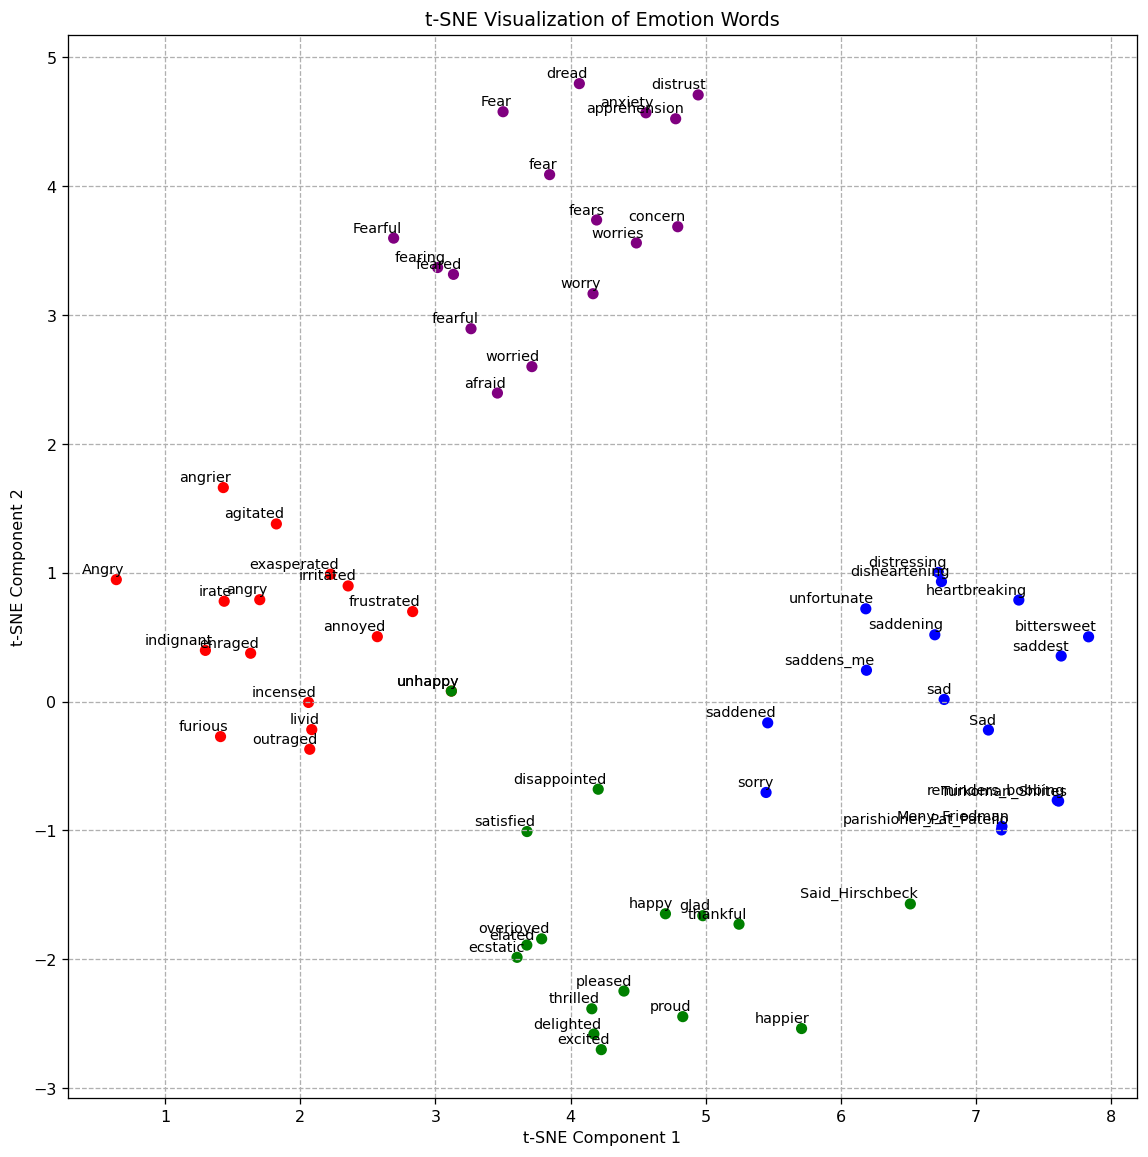

In [99]:
tsne = TSNE(n_components=2, metric='cosine', random_state=28, perplexity=30)

# Check if perplexity is valid for the number of samples
n_samples = X_train.shape[0]
if n_samples <= tsne.perplexity:
    print(f"Warning: Perplexity ({tsne.perplexity}) is too high for the number of samples ({n_samples}).")
    print("Setting perplexity to n_samples - 1.")
    tsne.perplexity = max(1, n_samples - 1) # Ensure perplexity is at least 1

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
print("Plotting t-SNE")
plt.figure(figsize=(12, 12), dpi=115)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color_list)
for label, x, y in zip(target_words, X_tsne[:, 0], X_tsne[:, 1]):
    plt.annotate(label, 
                 xy=(x,y), 
                 xytext=(5, 2), # Offset text slightly
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize=9)
plt.title("t-SNE Visualization of Emotion Words")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(True, linestyle='--')
plt.show()


Plotting UMAP


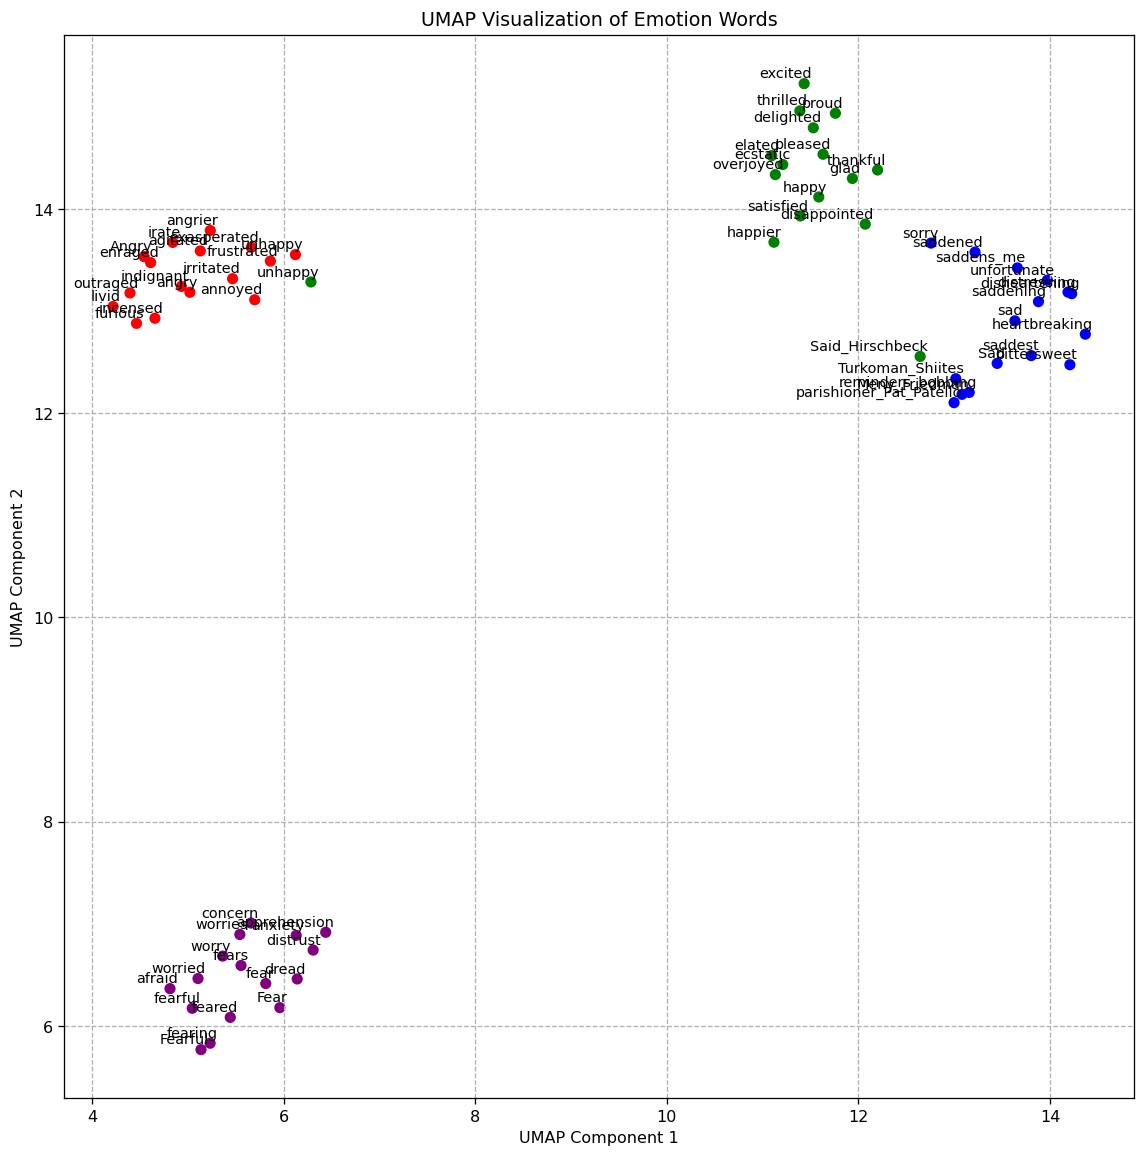

In [100]:
umap_model = umap.UMAP(n_components=2, 
                       metric='cosine', 
                       random_state=28, 
                       n_neighbors=10, 
                       min_dist=0.1)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
print("Plotting UMAP")
plt.figure(figsize=(12, 12), dpi=115)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=color_list)
for label, x, y in zip(target_words, X_umap[:, 0], X_umap[:, 1]):
    plt.annotate(label, 
                 xy=(x,y), 
                 xytext=(5, 2), # Offset text slightly
                 textcoords='offset points',
                 ha='right',
                 va='bottom',
                 fontsize=9)
plt.title("UMAP Visualization of Emotion Words")
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.grid(True, linestyle='--')
plt.show()


In both graphs, we can clearly see that the words related to a specific emotion have been grouped together into distinct, color-coded clusters. This confirms that the Word2Vec model has a strong, shared understanding for each set of related terms. For example, in both plots, the red 'angry' words (furious, irate, incensed) form a tight group, as do the purple 'fear' words (afraid, dread, anxiety) and so on.

The t-SNE plot is particularly good at showing the separation of the clusters. It has created four very distinct and spread-out groups, making it easy to identify them. The 'angry' cluster is on the far left, 'fear' is at the top, 'sad' is on the far right, and 'happy' is at the bottom. This type of clean separation is a known strength of t-SNE; it excels at showing the local structure and making it clear that these four concepts are mathematically different in the vector space. However, the large distances between the clusters in this plot are mostly for visual clarity and don't have a reliable meaning.

The UMAP plot tells a slightly different story. While it also identifies the same four tight clusters, it arranges them in a way that preserves more of the global structure, or the relationships between the groups. Here, we can see that the 'angry' (red) and 'fear' (purple) clusters are grouped relatively close together on the left side of the plot. This makes perfect semantic sense, as they are both high-arousal, negative emotions. This is the same confusion my classification models struggled with earlier, and this UMAP plot visualizes why: the words themselves are fundamentally "closer" in meaning.

Interestingly, the UMAP plot also places the 'happy' (green) and 'sad' (blue) clusters near each other on the right side of the plot, creating two "super-groups" of emotions. In summary, both plots confirm the Word2Vec model has learned distinct concepts for these emotions. But the t-SNE plot is better at just identifying the clusters, while the UMAP plot gives us more insight into how those clusters relate to each other in the high-dimensional space.

---